In [ ]:
import os
import pandas as pd

In [ ]:
from glob import glob

tracks_dir = "/playpen-storage/levlevi/player-re-id/src/testing/ocr_analysis/full_video_tracks"
tracks = glob(tracks_dir + "/*.txt")

In [ ]:
lengths = []
for fp in tracks[0:10]:
    with open(fp, 'r') as f:
        lines = f.readlines()
    index = ['frame', 'entity_id', 'x1', 'y1', 'width', 'height', 'conf', 'pad2', 'pad3', 'pad4']
    df = pd.read_csv(fp, names=index)[['frame', 'entity_id', 'x1', 'y1', 'width', 'height', 'conf']]
    entities = df.entity_id.unique()
    print(len(entities))
    for entity in entities:
        entity_df = df[df.entity_id == entity]
        lengths.append(len(entity_df))        

# print(f"Mean: {sum(lengths)/len(lengths)}")

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

lengths = np.array(lengths)
lengths_filtered = lengths[lengths > 25]

# Create the histogram
plt.hist(lengths_filtered, bins=50, range=(0, 1200))

# Calculate the mean
mean_length = np.mean(lengths_filtered)

# Plot the mean line
plt.axvline(mean_length, color='red', linestyle='dashed', linewidth=1)

# Add labels and title
plt.xlabel("Duration (Frames)", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Track Lengths", fontsize=16)

# Add text for the mean
plt.text(mean_length + 20, max(np.histogram(lengths_filtered, bins=30, range=(0, 1200))[0]) / 2,
         f'Mean: {mean_length:.2f}', color='red')

# Add grid
plt.grid(True)

# Show the plot
plt.show()



In [6]:
import os
from glob import glob

tracks_dir = '/playpen-storage/levlevi/player-re-id/src/testing/ocr_analysis/sample_tracks_nba_100/__tracks_nba_50_grouped__'
unique_tracks = glob(os.path.join(tracks_dir, '*'))

lengths = []
for subdir in unique_tracks:
    length = len(os.listdir(subdir))
    lengths.append(length)

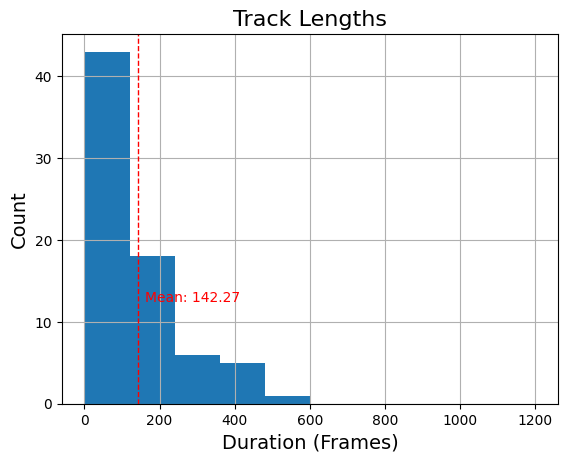

In [7]:
import matplotlib.pyplot as plt
import numpy as np

lengths = np.array(lengths)
lengths_filtered = lengths[lengths > 0]

# Create the histogram
plt.hist(lengths_filtered, bins=10, range=(0, 1200))

# Calculate the mean
mean_length = np.mean(lengths_filtered)

# Plot the mean line
plt.axvline(mean_length, color='red', linestyle='dashed', linewidth=1)

# Add labels and title
plt.xlabel("Duration (Frames)", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Track Lengths", fontsize=16)

# Add text for the mean
plt.text(mean_length + 20, max(np.histogram(lengths_filtered, bins=30, range=(0, 1200))[0]) / 2,
         f'Mean: {mean_length:.2f}', color='red')

# Add grid
plt.grid(True)

# Show the plot
plt.show()

In [ ]:
import shutil
src_dir = '/playpen-storage/levlevi/player-re-id/src/testing/ocr_analysis/sample_tracks_nba_100/__tracks_nba_50_grouped__'
dst_dir = '/playpen-storage/levlevi/player-re-id/src/testing/ocr_analysis/sample_tracks_nba_100/low_pass'

for subdir in unique_tracks:
    print(subdir)
    if len(os.listdir(subdir)) < 30:
        shutil.move(subdir, os.path.join(dst_dir, os.path.basename(subdir)))

In [10]:
import os
import pandas as pd
from glob import glob

tracks_dir = '/playpen-storage/levlevi/player-re-id/src/testing/ocr_analysis/sample_tracks_nba_100/__tracks_nba_50_grouped__/_hand-labeled'
tracks = os.listdir(tracks_dir)

In [15]:
df = pd.DataFrame()

ids = []
jersey_numbers = []
for track in tracks:
    track_id = int(track.split('_')[1])
    player_number = track.split('_')[2]
    ids.append(track_id)
    jersey_numbers.append(player_number if player_number != 'na' else None)
    
df['id'] = ids
df['jersey_number'] = jersey_numbers

In [20]:
df.dropna(how='any')

,id,jersey_number
0,61,22
1,113,2
3,306,2
5,16,2
6,300,6
...,...,...
94,18,2
95,47,5
96,121,12
97,284,35
